# 目的1
Confusion Matixごとの表記差異を確認し標準的な出力を出せるように変更する

## 標準的な出力
| |actual positive|actual negative|
|:-:|:-:|:-:|
|predict positive|TP|FP|
|predict negative|FN|TN|

※ 標準的な出力とは書いていますが、行列の記載順序に一般的な決まりは特にないらしいです。

## @MSさんのご助言を受けて追加

* scikit-learnだと、tn, fp, fn, tpの順で数値で出てくる

```
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
```

* 参考：<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html" title="sklearn.metrics.confusion_matrix — scikit-learn 0.23.2 documentation" target="_blank">sklearn.metrics.confusion_matrix — scikit-learn 0.23.2 documentation</a>

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = [0,1,0,1,0,1,0,0,1,1]
y_true = [0,1,1,1,0,0,0,1,1,1]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(3, 1, 2, 4)

なので、

| |actual positive|actual negative|
|:-:|:-:|:-:|
|predict positive|4|1|
|predict negative|2|3|

と、なる。

つまり、

* 1:Positive、0:Negative と、sk-learnも識別している

## 2Class

In [ ]:
y_pred = [0,1,0,1,0,1,0,0,1,1]
y_true = [0,1,1,1,0,0,0,1,1,1]

### 混同行列を人力で確認
| |actual positive|actual negative|
|:-:|:-:|:-:|
|predict positive|4|1|
|predict negative|2|3|

### confusion_matrixの出力

In [ ]:
import pandas as pd

# confusion_matrix表示関数（sklearの並び順は期待するものと違うかった）
def make_confusion_matrix(matrix, columns):
    '''
    :param matrix: numpy配列
    :param columns: 項目名リスト
    '''
    n = len(columns)

    # '正解データ'をn回繰り返すリスト生成
    actu = ['Actual'] * n
    pred = ['Predict'] * n

    #データフレーム生成
    cm = pd.DataFrame(matrix, 
        columns=[pred, columns], index=[actu, columns])
    return cm


In [ ]:
from sklearn.metrics import confusion_matrix

# sklearn の confusion_matrix 並びが通常と違うので気をつけること
matrix = confusion_matrix(y_true, y_pred)
columns = ['N', 'P']
result = make_confusion_matrix(matrix, columns)
result

Predict   
               N  P
Actual N       3  1
       P       2  4

### 標準的な出力

In [ ]:
import numpy as np

# 混同行列表示用関数（正しい並び順）
def make_confusion_matrix_true(matrix, labels):
    '''
    :param matrix: numpy配列
    :param labels: 項目名リスト
    '''
    n = len(labels)

    # '正解データ'をn回繰り返すリスト生成
    actu = ['Actual'] * n
    pred = ['Predict'] * n

    #データフレーム生成
    c_matrix = pd.DataFrame(np.roll(np.roll(matrix, 1, axis=0), 1, axis=1).T, 
        columns=[actu, columns], index=[pred, columns])
    return c_matrix


In [ ]:
matrix = confusion_matrix(y_true, y_pred)
columns = ['P', 'N']
result = make_confusion_matrix_true(matrix, columns)
result

Actual   
               P  N
Predict P      4  1
        N      2  3

## Multi-Class

In [ ]:
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]

### 混同行列を人力で確認
| |actual c0|actual c1|actual c2|
|:-:|:-:|:-:|:-:|
|predict c0|3|0|1|
|predict c1|0|0|2|
|predict c2|0|2|1|

### confusion_matrixの出力

Text(48.5, 0.5, 'Actual Labels')

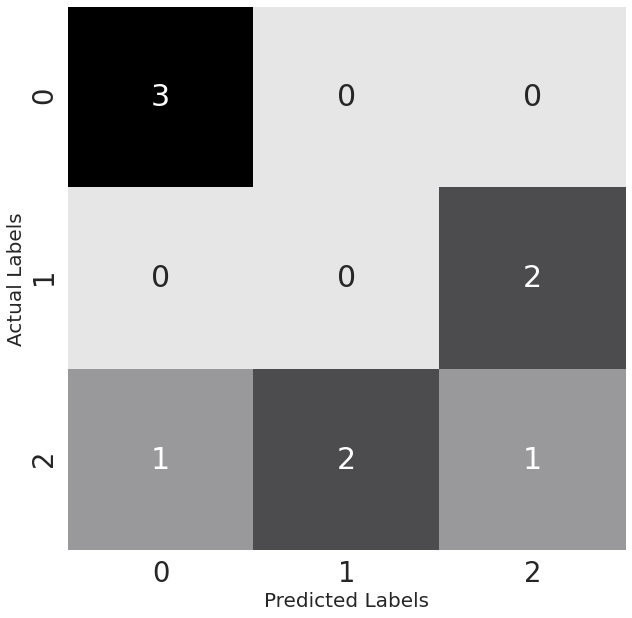

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# get confusion matrix from sklearn 
cm = confusion_matrix(y_true, y_pred)
 
# plot using matplotlib and seaborn 
plt.figure(figsize=(10, 10)) 
cmap = sns.cubehelix_palette(
    50, 
    hue=0.05, 
    rot=0, 
    light=0.9, 
    dark=0, 
    as_cmap=True) 
sns.set(font_scale=2.5) 
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False) 

plt.xlabel('Predicted Labels', fontsize=20)
plt.ylabel('Actual Labels', fontsize=20) 

### 標準的な出力

Text(48.5, 0.5, 'Predicted Labels')

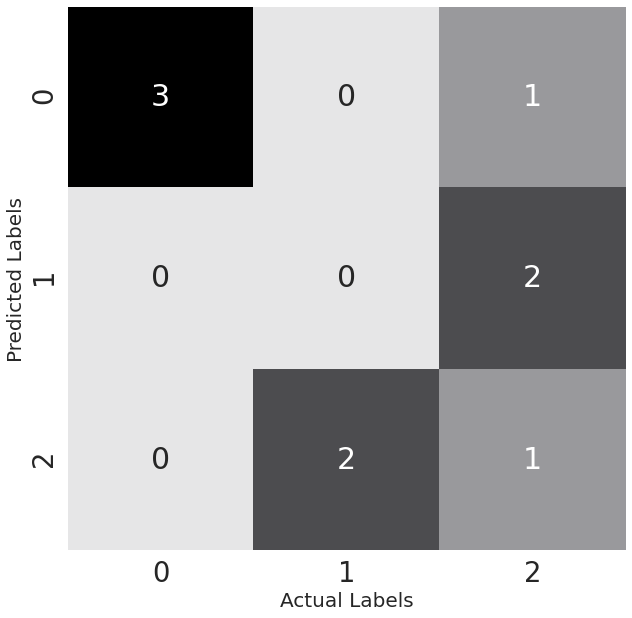

In [ ]:
# plot using matplotlib and seaborn 
plt.figure(figsize=(10, 10)) 
cmap = sns.cubehelix_palette(
    50, 
    hue=0.05, 
    rot=0, 
    light=0.9, 
    dark=0, 
    as_cmap=True) 
sns.set(font_scale=2.5) 
sns.heatmap(cm.T, annot=True, cmap=cmap, cbar=False) 

plt.xlabel('Actual Labels', fontsize=20) 
plt.ylabel('Predicted Labels', fontsize=20) 